In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [20]:
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
DATA_PATH = Path() / "data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')

PLOT_PATH = Path() / "plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
data = load_data("McDonald_s_Reviews_Cleaned.csv")
data

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,processed_review_basic,rating_numeric,rating_numerical,state
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,look like someone spit food normal transaction...,1,1.0,TX
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,it'd mcdonalds. far food atmosphere go. staff ...,4,4.0,TX
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,made mobile order got speaker checked in. line...,1,1.0,TX
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,mc. crispy chicken sandwich customer service q...,5,5.0,TX
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,repeat order 3 time drive thru still manage me...,1,1.0,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32644,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star,treated badly.,1,1.0,FL
32645,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars,service good,5,5.0,FL
32646,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars,remove hunger enough,4,4.0,FL
32647,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars,good lately become expensive.,5,5.0,FL


In [16]:
# preprocessed_sentences = sample['sentences'].apply(lambda x: ' '.join(preprocess(' '.join(x))))

# Creating a single TfidfVectorizer instance
vec = TfidfVectorizer(max_features = 25) #, vocabulary = macro_indicators)

# Applying it to the preprocessed sentences
tfidf_matrix = vec.fit_transform(data["processed_review_basic"])

# Getting the array and feature names
tfidf_array = tfidf_matrix.toarray()
features = vec.get_feature_names_out()

# Creating a DataFrame from the array
tfidf_df = pd.DataFrame(tfidf_array, columns = features)

# Combining with original data
# combined_df = pd.concat([sample[['publishOn', 'title', 'content']], tfidf_df], axis=1)

# Save the combined DataFrame to CSV
# combined_df.to_csv("sample_data_with_tfidf.csv", index=False)

In [17]:
tfidf_df

,always,clean,customer,drive,excellent,fast,food,fry,get,go,...,mcdonald,minute,one,order,people,place,service,staff,thru,time
0,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.816302,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
1,0.420091,0.0,0.000000,0.000000,0.0,0.39199,0.576285,0.000000,0.000000,0.416052,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.405788,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.372339,0.000000,...,0.0,0.0,0.0,0.313933,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.817094,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.576505,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.528591,0.0,0.00000,0.000000,0.315172,0.000000,0.000000,...,0.0,0.0,0.0,0.445089,0.0,0.0,0.000000,0.000000,0.592691,0.268087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32644,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
32645,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.691557,0.000000,0.000000,0.000000
32646,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
32647,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000


In [18]:
tfidf_df.dtypes

always       float64
clean        float64
customer     float64
drive        float64
excellent    float64
fast         float64
food         float64
fry          float64
get          float64
go           float64
good         float64
got          float64
great        float64
like         float64
location     float64
mcdonald     float64
minute       float64
one          float64
order        float64
people       float64
place        float64
service      float64
staff        float64
thru         float64
time         float64
dtype: object

In [54]:
#building bag of words using frequency
vec_words = CountVectorizer(decode_error="ignore")
total_features_words = vec_words.fit_transform(data["processed_review_basic"])
#print("The size of the vocabulary space:")
#print(total_features_words.shape)

#Calculating pairwise cosine similarity
subset_sparse = sparse.csr_matrix(total_features_words)
total_features_review=subset_sparse
total_features_attr=subset_sparse[0,]
similarity=1-pairwise_distances(total_features_attr,total_features_review, metric='cosine')

#Assigning the similarity score to dataframe
similarity_df=pd.DataFrame(similarity)
similarity_df=similarity_df.transpose()
similarity_df.columns = ['similarity']
# similarity=similarity.drop(similarity.index[[0]]) # drop the first row
data=data.assign(similarity=similarity_df.values)


In [55]:
data

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating,processed_review_basic,rating_numeric,rating_numerical,state,similarity
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star,look like someone spit food normal transaction...,1,1.0,TX,1.000000
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars,it'd mcdonalds. far food atmosphere go. staff ...,4,4.0,TX,0.157135
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star,made mobile order got speaker checked in. line...,1,1.0,TX,0.032075
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars,mc. crispy chicken sandwich customer service q...,5,5.0,TX,0.000000
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star,repeat order 3 time drive thru still manage me...,1,1.0,TX,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32644,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star,treated badly.,1,1.0,FL,0.000000
32645,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars,service good,5,5.0,FL,0.000000
32646,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars,remove hunger enough,4,4.0,FL,0.000000
32647,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars,good lately become expensive.,5,5.0,FL,0.000000


In [65]:
num_items = int(np.ceil(np.sqrt(1 + 8 * len(similarity[0])) / 2))

# Initialize an n x n similarity matrix
similarity_matrix = np.zeros((num_items, num_items))

# Populate the similarity matrix
index = 0
for i in range(num_items):
    for j in range(i + 1, num_items):
        similarity_matrix[i, j] = similarity[0][index]
        similarity_matrix[j, i] = similarity[0][index]  # Mirror the score across the diagonal
        index += 1

In [68]:
len(similarity[0])

32649

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


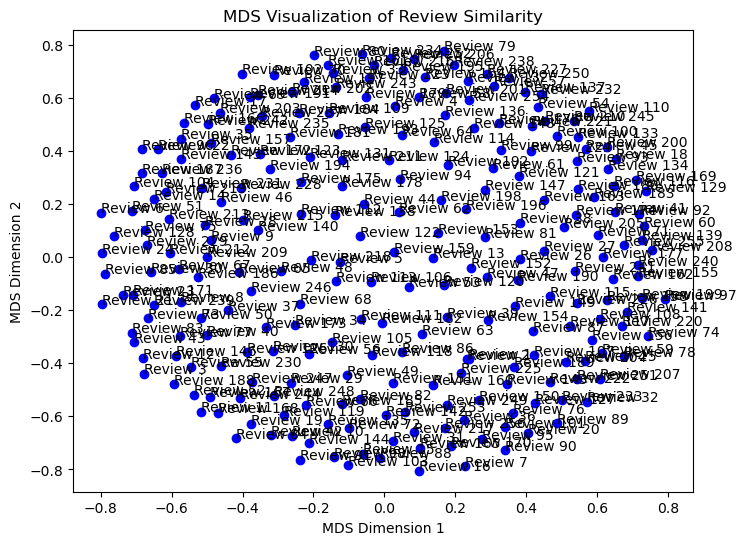

In [70]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)

# Fit the MDS model to convert the cosine similarity matrix to a 2D space
# Note: MDS works on dissimilarity. If your data is similarity scores, you might need to convert them to distances.
mds_results = mds.fit_transform(1 - similarity_matrix)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(mds_results[:, 0], mds_results[:, 1], c='blue', marker='o')
for i in range(mds_results.shape[0]):
    plt.text(mds_results[i, 0], mds_results[i, 1], f'Review {i+1}')

plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS Visualization of Review Similarity')
plt.show()